In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip -q /content/subset.zip

replace subset/test/DrinkCans/DrinkCans_126.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

In [5]:
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape = (254, 254, 3)))

model.add(layers.Conv2D(filters = 32, kernel_size = (5,5), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(3, 3), padding = "same") )

model.add(layers.Conv2D(filters = 64, kernel_size = (5,5), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(3, 3), padding = "same") )

model.add(layers.Conv2D(filters = 64, kernel_size = (4,4), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(3, 3), padding = "same") )

model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model.add(layers.Conv2D(filters = 256, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters = 256, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model.add(layers.Dropout(0.3))

model.add(layers.Flatten())

# Here we flatten our data to end up with just one dimension

model.add(layers.Dense(128, activation="relu"))

model.add(layers.Dense(5, activation="softmax"))

In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 254, 254, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 85, 85, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 29, 29, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,210,245 (4.62 MB)

 Trainable params: 1,210,245 (4.62 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

In [8]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_ds = image_dataset_from_directory(
  '/content/subset/train',
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(254, 254),
  batch_size=32)

val_ds = image_dataset_from_directory(
  '/content/subset/val',
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(254, 254),
  batch_size=32)

Found 1029 files belonging to 5 classes.
Found 254 files belonging to 5 classes.


In [9]:
class_names = train_ds.class_names
print(class_names)

['DrinkCans', 'GlassBottles', 'Organic', 'Paper', 'PlasticBottles']


In [10]:
class_val_names = val_ds.class_names
print(class_val_names)

['DrinkCans', 'GlassBottles', 'Organic', 'Paper', 'PlasticBottles']


In [11]:
#MODEL = "model_1"

#modelCheckpooint = callbacks.ModelCheckpoint("{}.h5".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

In [12]:
%%time

history = model.fit(
        train_ds,
        epochs=30,
        validation_data=val_ds,
        callbacks = [LRreducer, EarlyStopper])

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 416ms/step - accuracy: 0.3067 - loss: 1.5516 - val_accuracy: 0.3504 - val_loss: 1.5105 - learning_rate: 0.0010
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 129ms/step - accuracy: 0.3484 - loss: 1.4823 - val_accuracy: 0.4252 - val_loss: 1.3722 - learning_rate: 0.0010
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.4524 - loss: 1.3676 - val_accuracy: 0.5079 - val_loss: 1.2569 - learning_rate: 0.0010
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.4888 - loss: 1.2777 - val_accuracy: 0.5591 - val_loss: 1.2640 - learning_rate: 0.0010
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.5338 - loss: 1.2229 - val_accuracy: 0.4882 - val_loss: 1.2480 - learning_rate: 0.0010
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.5587 - loss: 1.1549 - val_accuracy: 0.5276 - val_loss: 1.1192 - learning_rate: 0.0010
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.5927 - loss: 1.0217 

In [13]:
import matplotlib.pyplot as plt

def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

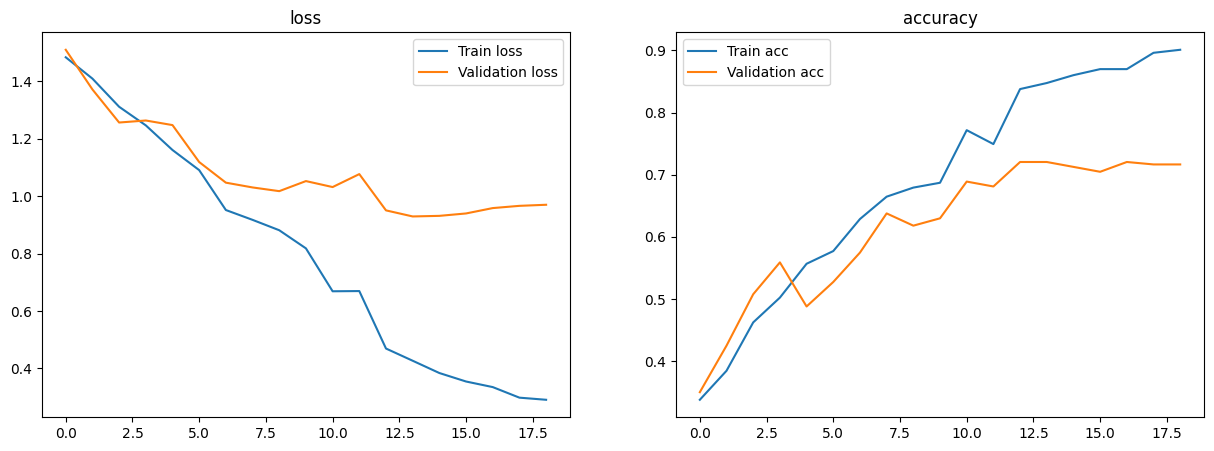

In [14]:
plot_history(history)

In [15]:
from tensorflow.image import resize

def preprocess_image(image):
    image = resize(image, (254, 254))  # Resize
    #image = image / 255.0  # Scale
    return image

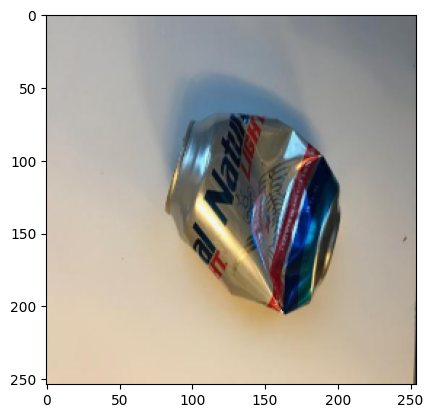

In [21]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

image = load_img('/content/subset/test/DrinkCans/DrinkCans_16.jpg')
image = img_to_array(preprocess_image(image))
plt.imshow(image / 255.0)

In [22]:
import numpy as np
image = image.reshape((-1, 254, 254, 3))
res = model.predict(image)
class_names[np.argmax(res)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'DrinkCans'

In [23]:
model.save('/content/model_v1.keras')
model.save('/content/model_v1.h5')